## Cardiovascular Diseases Risk Prediction

### Table of Contents:
### 1. Data Loading and Initial Exploration
### 2. Data Analysis and Visualization
### 3. Data Cleaning and Preprocessing
### 4. Feature Engineering
### 5. Model Training and Validation
### 6. Model Evaluation and Selection

------------------------------------------------------------------------

## 1. Data Loading and Initial Exploration

### Import neccessey libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### Read Data from Csv file

In [2]:
# Loading the dataset
df = pd.read_csv('Dataset/CVD_cleaned.csv')

In [3]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168,81.65,29.05,No,4,30,8,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0


In [4]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

In [6]:
df.shape

(308854, 19)

In [7]:
#Checking the number of unique values
df.select_dtypes(include='object').nunique()

General_Health      5
Checkup             5
Exercise            2
Heart_Disease       2
Skin_Cancer         2
Other_Cancer        2
Depression          2
Diabetes            4
Arthritis           2
Sex                 2
Age_Category       13
Smoking_History     2
dtype: int64

In [8]:
# Iterate through columns in the DataFrame 'heart' that contain data of object type
for col in df.select_dtypes(include="object"):
    # Print the name of the current column
    print(f"Column name: {col}")
    
    # Print the unique values present in the current column
    print("Categories:", df[col].unique())
    
    # Print the count for each category
    print("Category Counts:")
    print(df[col].value_counts())
    
    # Print a separator line to visually separate different columns' outputs
    print('\n', '-'*60, '\n')

Column name: General_Health
Categories: ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Category Counts:
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64

 ------------------------------------------------------------ 

Column name: Checkup
Categories: ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Category Counts:
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64

 ------------------------------------------------------------ 

Column name: Exercise
Categories: ['No' 'Yes']
Category Counts:
Yes    239381
No      69473
Name: Exercise, dtype: int64

 ------------------------------------------------------------ 

Column name: Heart_Disease
Categories: ['No' 'Yes']
Category Counts:
No     283883
Yes   

## 2. Data Analysis and Visualization

- In this section, I will divide my analysis into three sections which are univariate, bivariate, and multivariate analysis to reveal insightful patterns and trends related to the occurrence of diseases.

###  I - Univariate Analysis

#### Numerical Variables

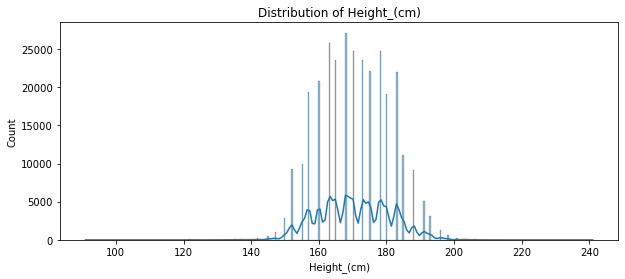

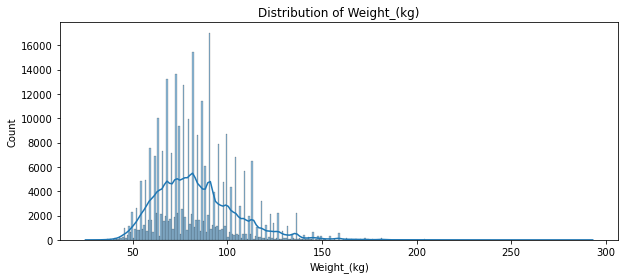

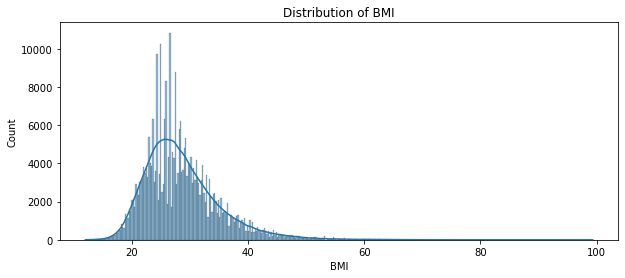

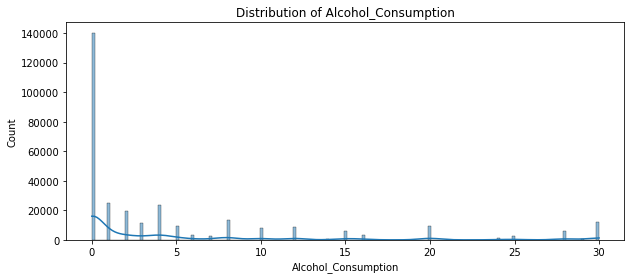

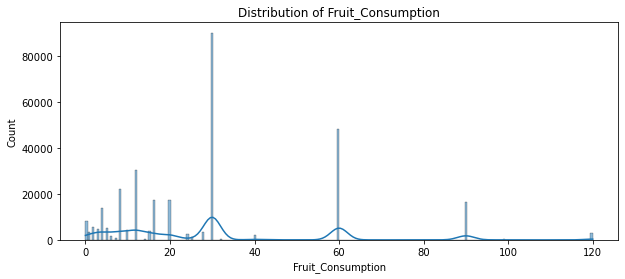

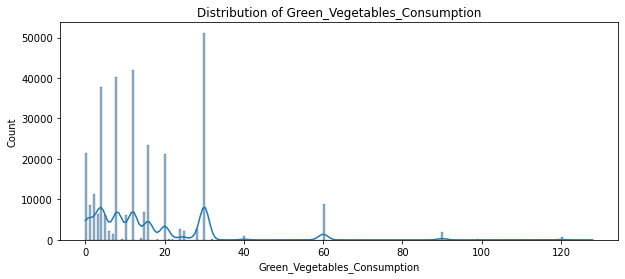

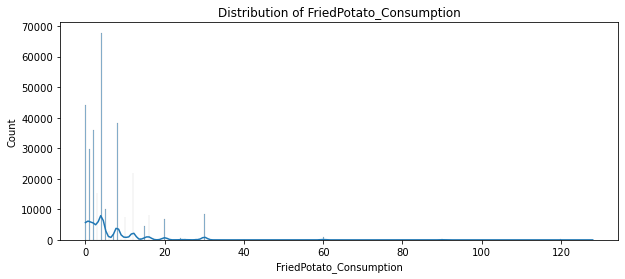

In [9]:
# Univariate Analysis
# Check the distribution of numerical features
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title('Distribution of ' + feature)
    plt.show()

#### Output Interpretation: 
- Height_(cm): The height of the patients seems to follow a normal distribution, with the majority of patients having heights around 160 to 180 cm.

- Weight_(kg): The weight of the patients also appears to be normally distributed, with most patients weighing between approximately 60 and 100 kg.

- BMI: The distribution of Body Mass Index is somewhat right-skewed. A large number of patients have a BMI between 20 and 30, which falls within the normal to overweight range. However, there are also a significant number of patients with a BMI in the obese range (>30).

- Alcohol_Consumption: This feature is heavily right-skewed. Most patients have low alcohol consumption, but there are a few patients with high consumption.

- Fruit_Consumption: This feature is also right-skewed. A lot of patients consume fruits regularly, but a significant number consume them less frequently.

- Green_Vegetables_Consumption: This feature appears to be normally distributed, with most patients consuming green vegetables moderately.

- FriedPotato_Consumption: This feature is right-skewed. Many patients consume fried potatoes less frequently, while a few consume them more often.

#### Categorial Variables

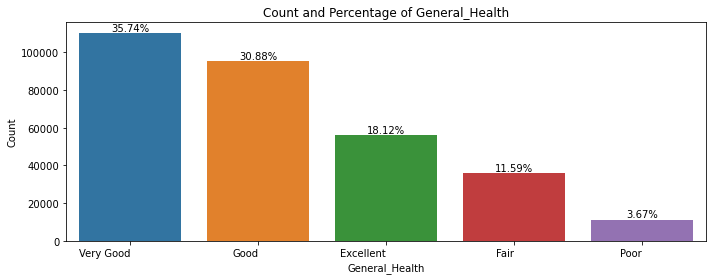

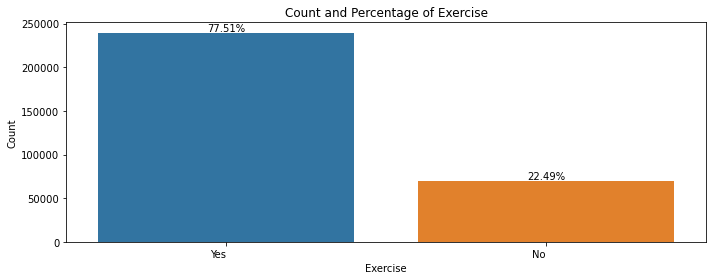

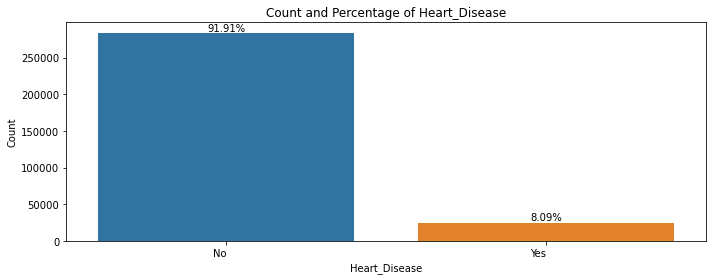

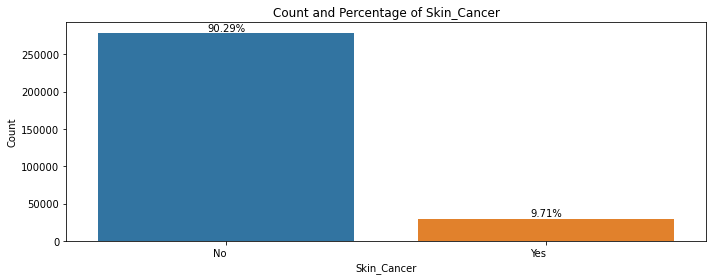

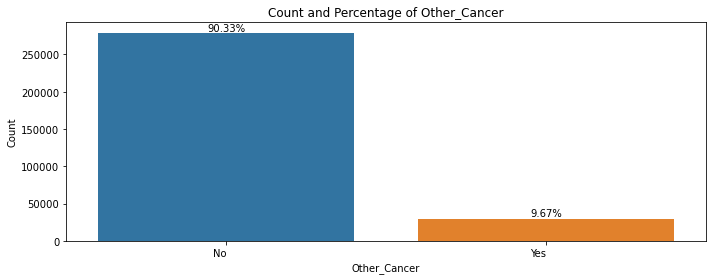

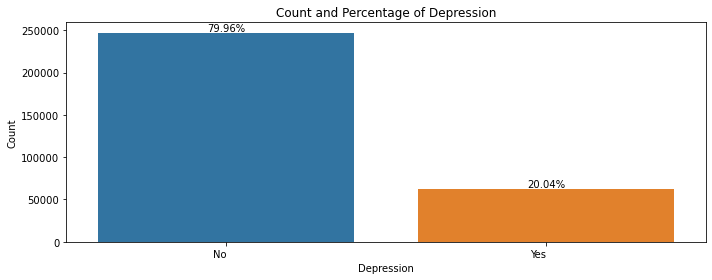

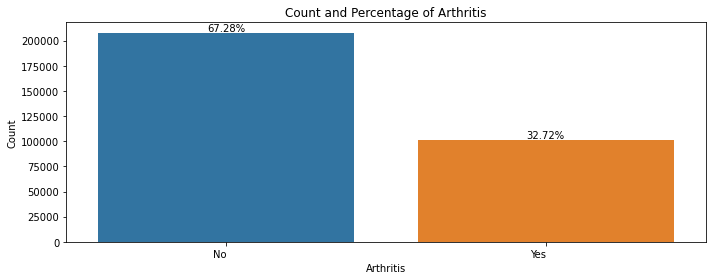

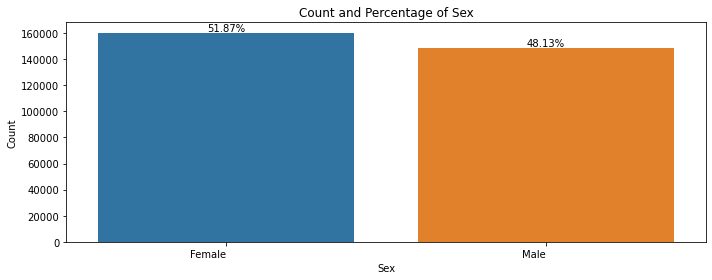

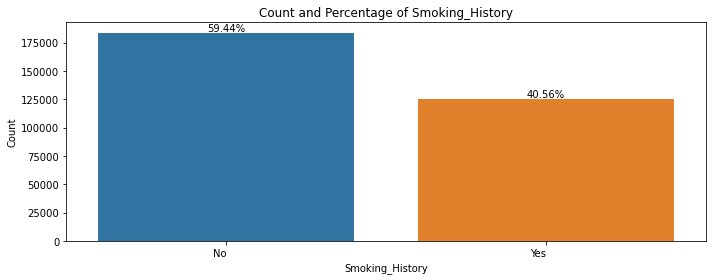

In [10]:
# Check the distribution of categorical features
categorical_features = ['General_Health', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Sex', 'Smoking_History']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    
    # Calculate counts for each category
    category_counts = df[feature].value_counts()
    
    # Calculate percentages for each category
    category_percentages = (category_counts / category_counts.sum()) * 100
    
    # Sort the categories by percentage in descending order
    category_percentages_sorted = category_percentages.sort_values(ascending=False)
    
    # Plot the count of each category
    sns.barplot(x=category_percentages_sorted.index, y=category_counts.values)
    
    # Plot the percentage on top of each bar
    for i, count in enumerate(category_counts):
        plt.text(i, count, f'{category_percentages_sorted.values[i]:.2f}%', ha='center', va='bottom')
    
    plt.title('Count and Percentage of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0, ha='right')
    plt.tight_layout()
    plt.show()

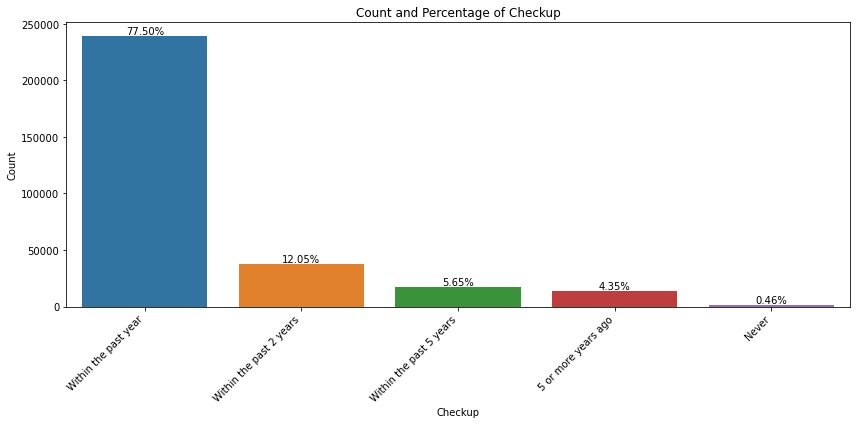

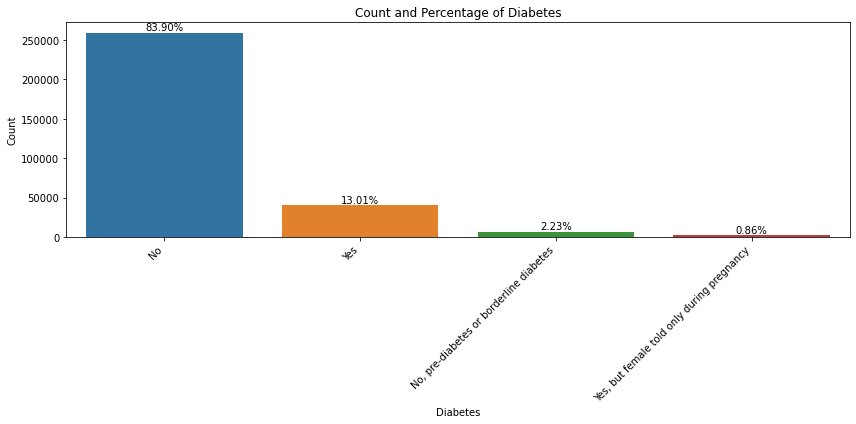

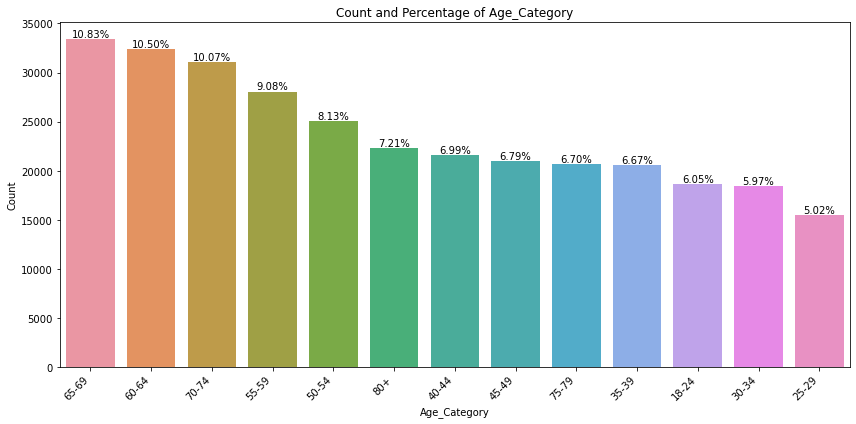

In [11]:
# Check the distribution of categorical features
categorical_features = ['Checkup','Diabetes',  'Age_Category']

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    
    # Calculate counts for each category
    category_counts = df[feature].value_counts()
    
    # Calculate percentages for each category
    category_percentages = (category_counts / category_counts.sum()) * 100
    
    # Sort the categories by percentage in descending order
    category_percentages_sorted = category_percentages.sort_values(ascending=False)
    
    # Plot the count of each category
    sns.barplot(x=category_percentages_sorted.index, y=category_counts.values)
    
    # Plot the percentage on top of each bar
    for i, count in enumerate(category_counts):
        plt.text(i, count, f'{category_percentages_sorted.values[i]:.2f}%', ha='center', va='bottom')
    
    plt.title('Count and Percentage of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### Output Interpretation: 
- General_Health: Most patients describe their general health as "Very Good", with "Good" being the second most common response followed by "Excellent". Fewer patients rate their health as "Fair" or "Poor".
- Exercise: 77.51% of the patients reported that they exercise compared to those who do not.
- **Heart_Disease(target variable)**: A significant majority of patients do not have heart disease, which represents 91.9% (283,883 patients). Only a small proportion of patients have heart disease, representing 8.09% (24,971 patients). This shows that there is class imbalance.
- Skin_Cancer: The vast majority of patients do not have skin cancer which represents 90.29% of the total data. 
- Other_Cancer: Similar to skin cancer, most patients do not have other forms of cancer which represents 90.33% of the total data.
- Depression: Most patients do not suffer from depression. However, 20% of the patients do report having depression.
- Arthritis: Most patients do not have arthritis, but 32% of the patients do.
- Sex: There are slightly more female patients than male patients in the dataset. 51.87% are females, totalling 160,196 patients, while 48.13% are males, totalling 148,658 patients.
- Smoking_History: The majority of patients do not have a history of smoking which represents 59.44% of the total data. 
- Checkup: The majority of patients had a checkup within the past year. Fewer patients had their last checkup 2 years ago or more than 5 years ago.
- Diabetes: Similar to the disease-related features above, most patients do not have diabetes. However, a small proportion do have diabetes.
- Age_Category: The dataset includes patients from a wide range of age categories. The 65-69 age category has the most patients, followed by the 60-64 and 70-74 categories.

###  II - Bivariate Analysis

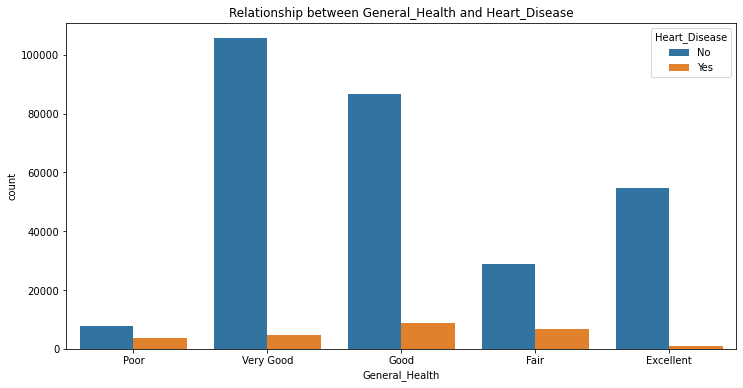

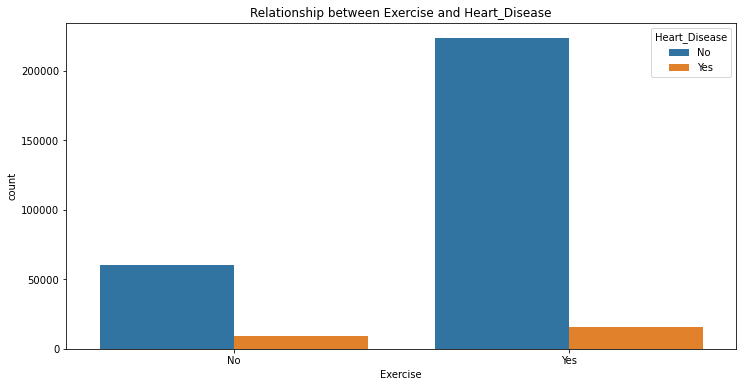

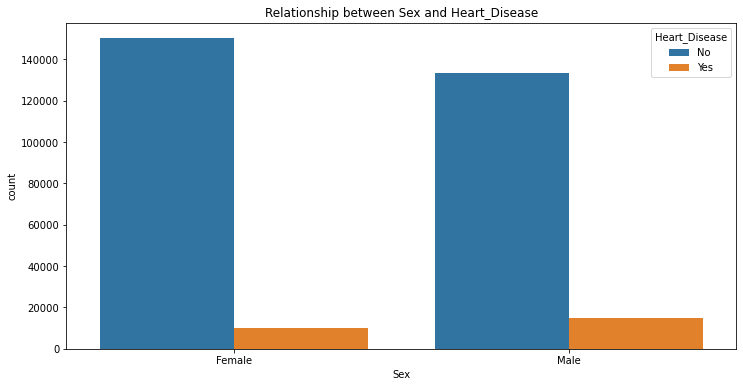

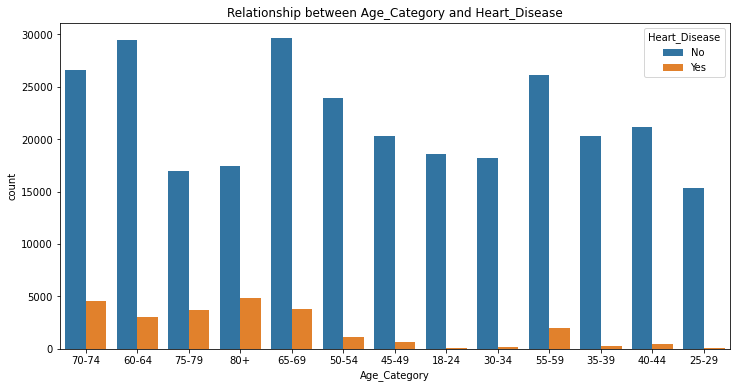

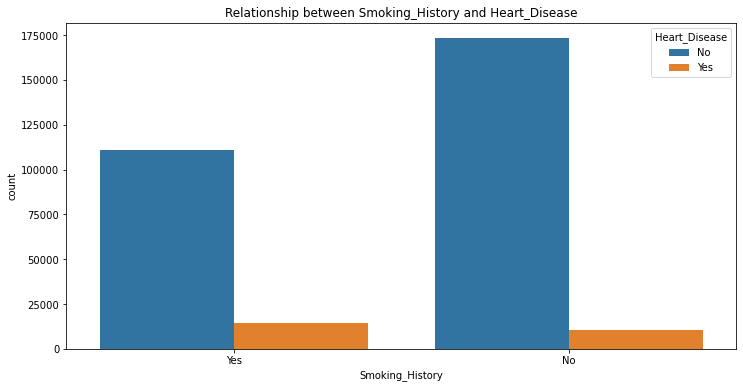

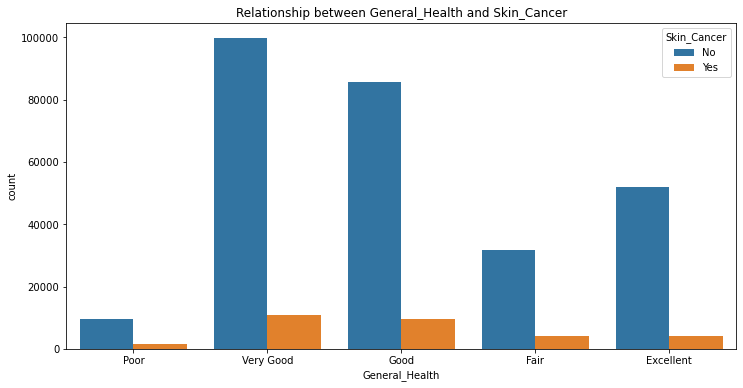

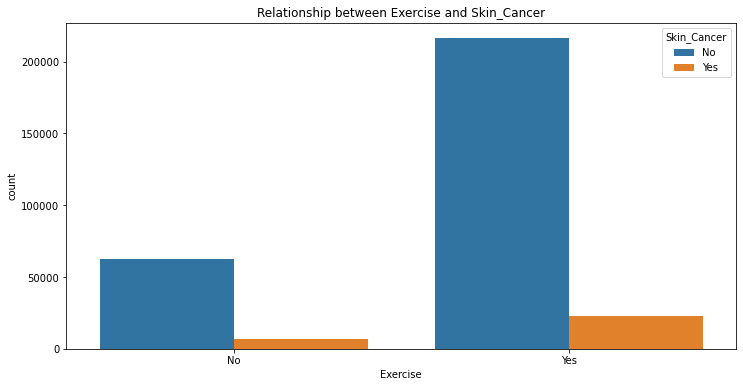

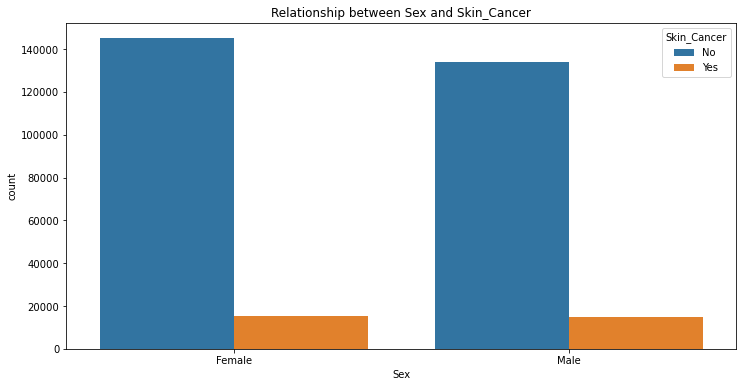

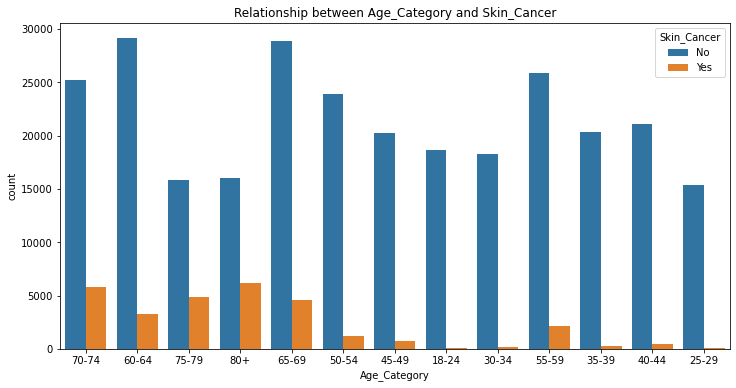

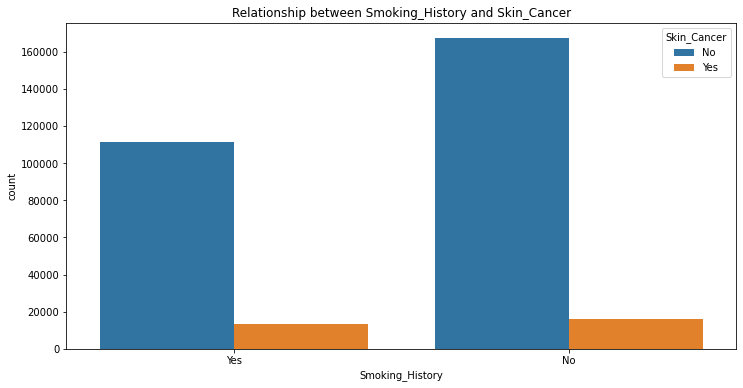

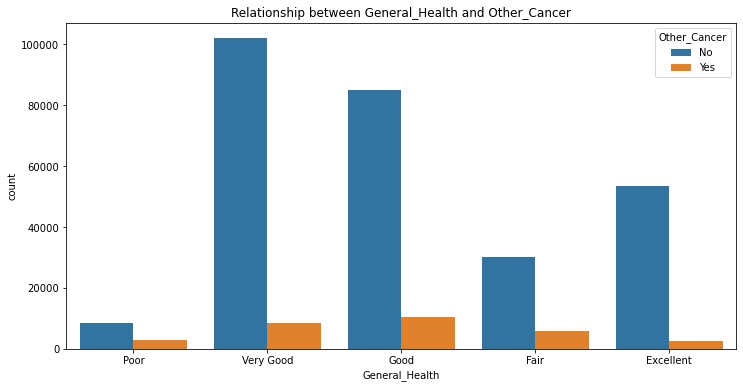

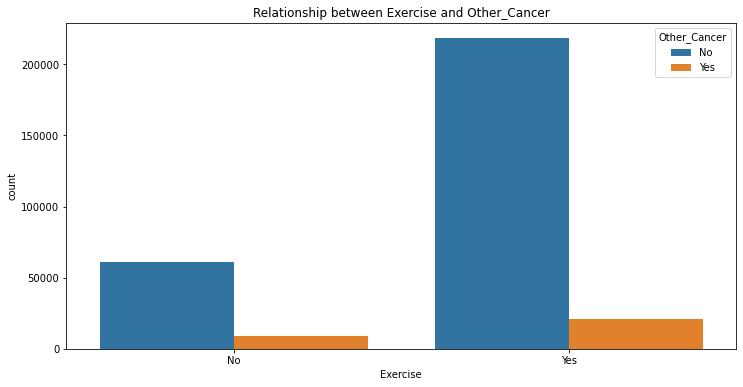

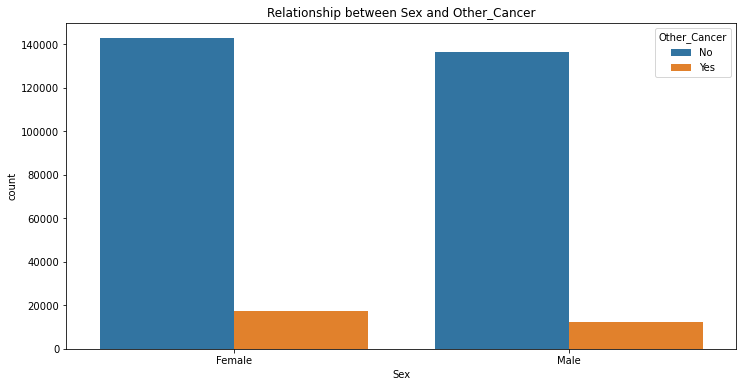

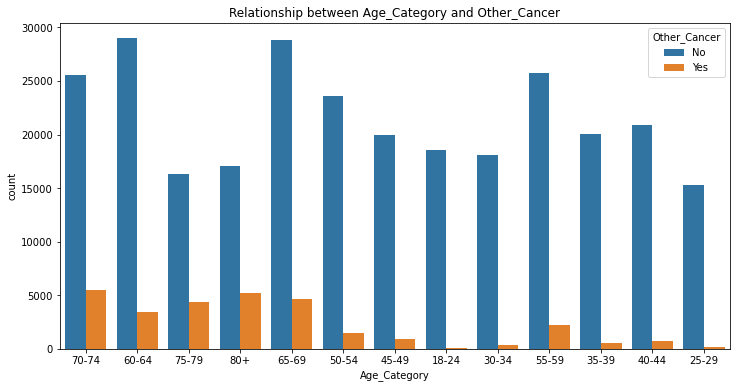

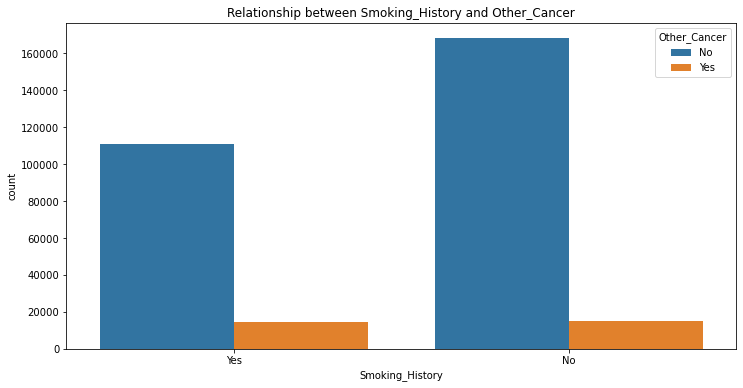

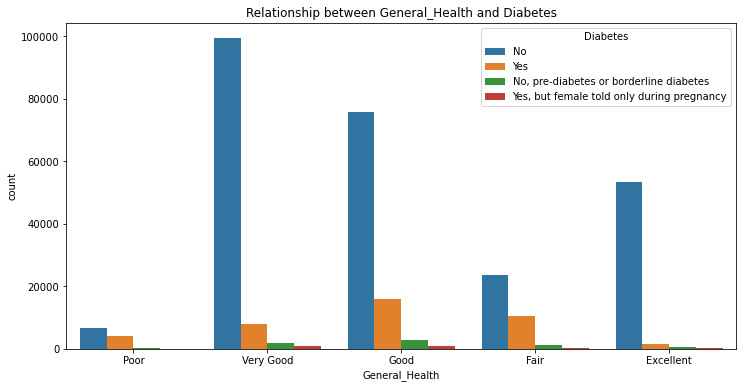

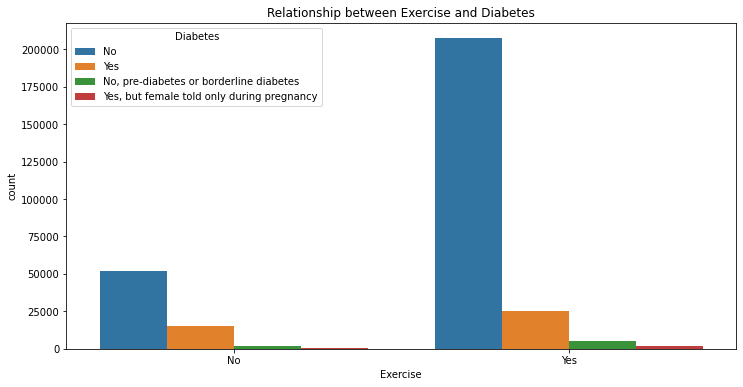

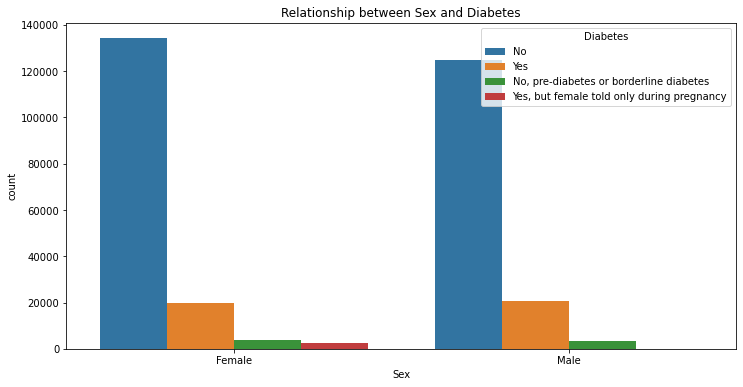

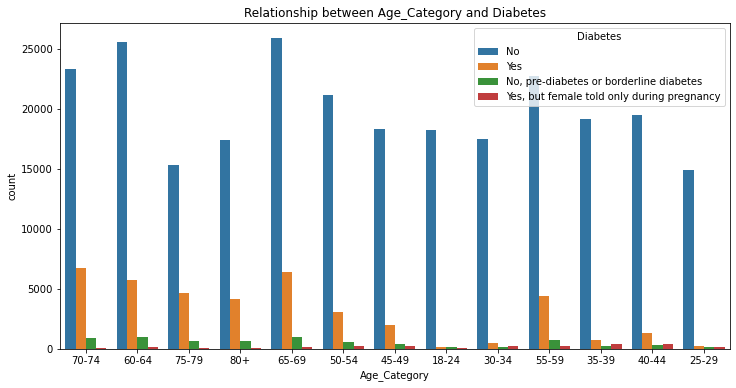

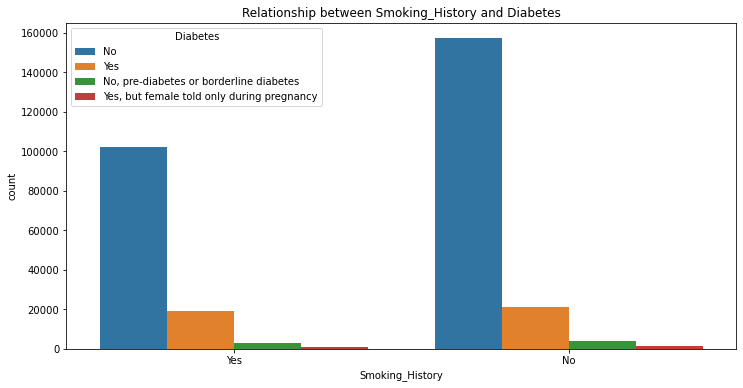

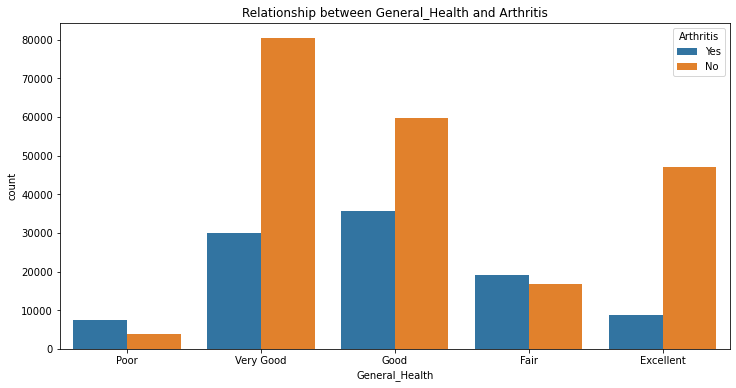

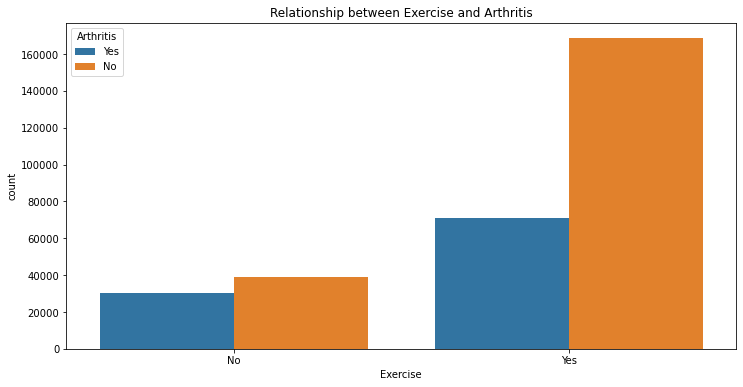

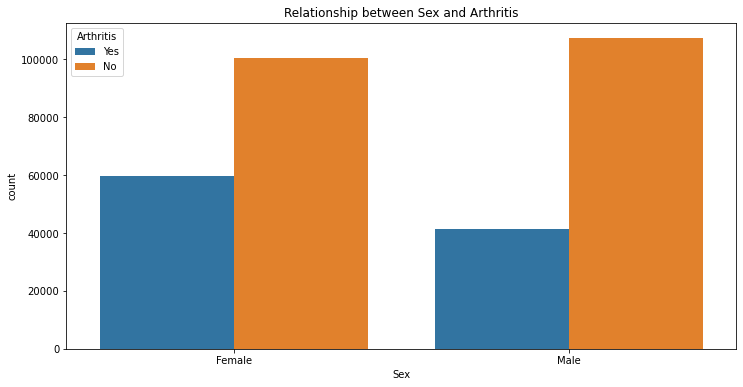

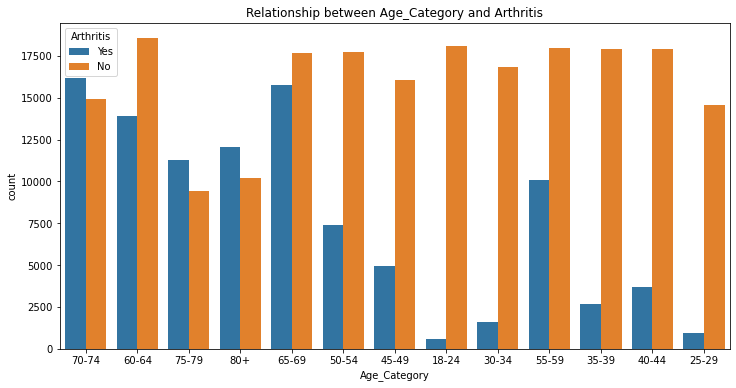

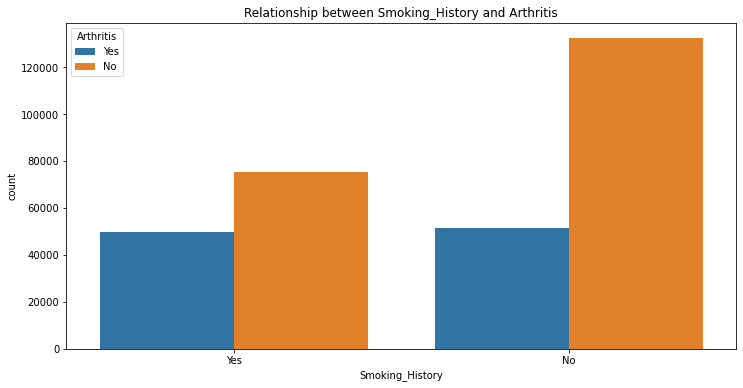

In [12]:
# Bivariate Analysis
# Analyze the relationship between the disease conditions and some selected variables

selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']

disease_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']

for disease in disease_conditions:
    for variable in selected_variables:
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x=variable, hue=disease)
        plt.title('Relationship between ' + variable + ' and ' + disease)
        plt.xticks(rotation=0)
        plt.show()

#### Output Interpretation: 
1. Heart_Disease:
- Heart disease is more common in patients who rate their general health as "Poor" or "Fair".
- It is slightly common in patients who do not exercise. 
- Males are more likely to have heart disease than females. 
- The prevalence of heart disease increases with age, with it being most common in the 80+ age category. 
- Heart disease is also more common in patients with a history of smoking. 
2. Skin_Cancer:
- Skin cancer is more prevalent in patients who rate their general health as "Good" or "Very Good".
- There is not much difference in prevalence based on exercise habits. 
- Females are more likely to have skin cancer than males.
- The prevalence of skin cancer increases with age, with it being most common in the 70-74 age category. 
- There is not much difference in prevalence based on smoking history. 
3. Other_Cancer:
- Other cancers are more prevalent in patients who rate their general health as "Poor" or "Fair".
- They are slightly more common in patients who do not exercise. 
- There is not much difference in prevalence based on sex. 
- The prevalence of other cancers increases with age, with it being most common in the 75-79 age category. 
- Other cancers are more common in patients with a history of smoking. 
4. Diabetes:
- Diabetes is more prevalent in patients who rate their general health as "Fair" or "Poor".
- It is more common in patients who do not exercise. 
- There is not much difference in prevalence based on sex. 
- The prevalence of diabetes increases with age, with it being most common in the 70-74 age category. 
- Diabetes is more common in patients with a history of smoking. 
5. Arthritis:
- Arthritis is more prevalent in patients who rate their general health as "Fair" or "Poor".
- It is slightly more common in patients who do not exercise. 
- Females are more likely to have arthritis than males. 
- The prevalence of arthritis increases with age, with it being most common in the 75-79 age category. 
- Arthritis is slightly more common in patients with a history of smoking. 

#### III- Multivariate Analysis

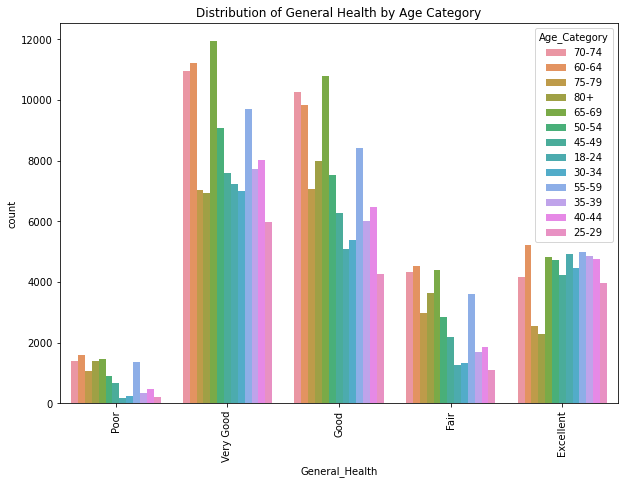

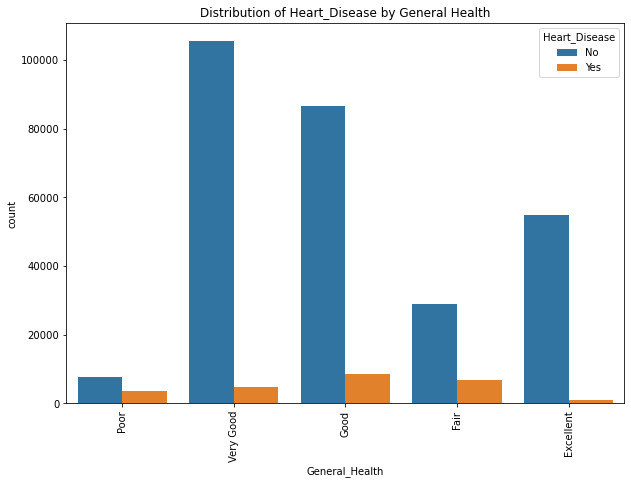

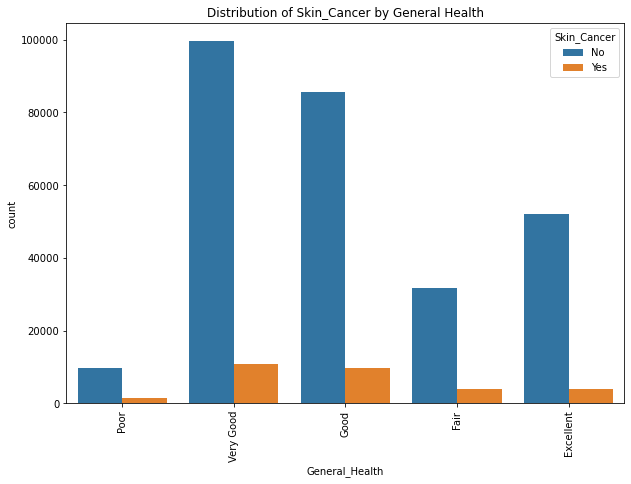

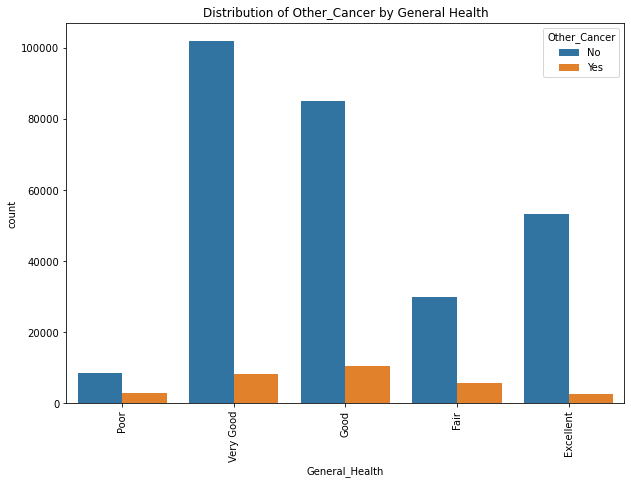

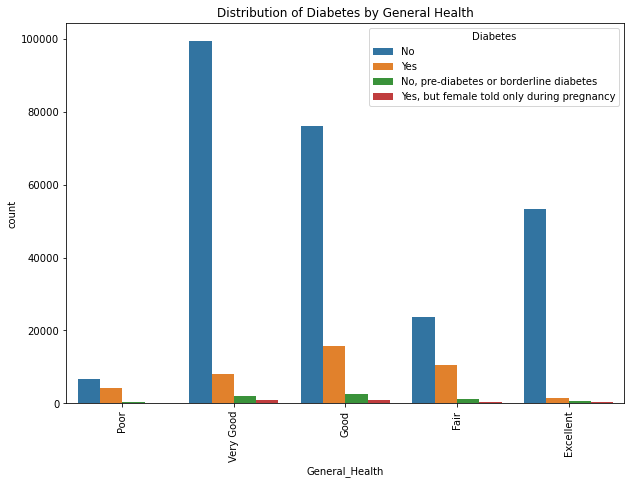

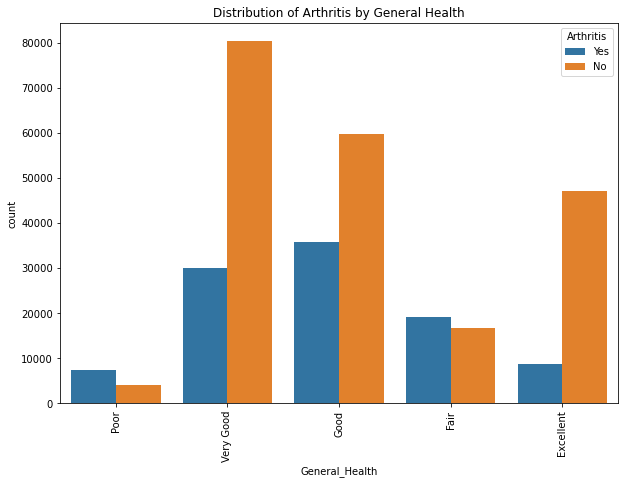

In [13]:
# Multivariate Analysis
# Analyze the relationship between disease conditions, general health, and age category

plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='General_Health', hue='Age_Category')
plt.title('Distribution of General Health by Age Category')
plt.xticks(rotation=90)
plt.show()

for disease in disease_conditions:
    plt.figure(figsize=(10, 7))
    sns.countplot(data=df, x='General_Health', hue=disease)
    plt.title('Distribution of ' + disease + ' by General Health')
    plt.xticks(rotation=90)
    plt.show()

#### Output Interpretation: 
- The distribution of General Health by Age Category shows that as age increases, the proportion of individuals rating their health as "Good" or "Very Good" decreases, while the proportion rating their health as "Fair" or "Poor" increases.

- The relationship between General Health and the disease conditions (Heart_Disease, Skin_Cancer, Other_Cancer, Diabetes, Arthritis) shows some interesting patterns:

    - For Heart_Disease, Other_Cancer, Diabetes, and Arthritis, the prevalence is higher among those who rate their health as "Poor" or "Fair". This suggests that these conditions may significantly impact individuals' perception of their general health.

    - For Skin_Cancer, the prevalence seems to be more evenly distributed across the different health ratings. This could suggest that skin cancer may not impact individuals' perception of their general health as much as the other conditions.

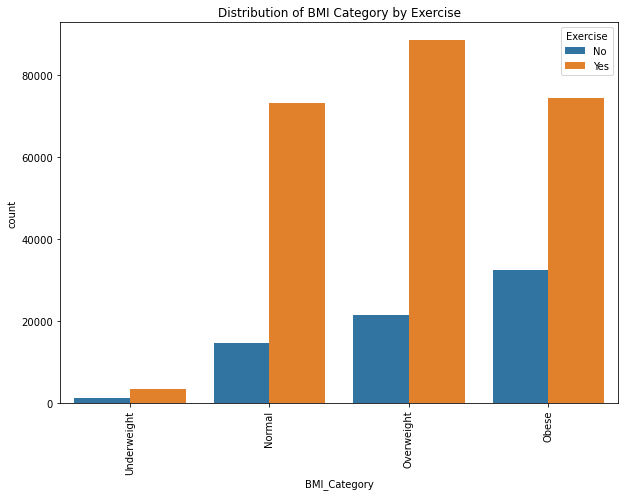

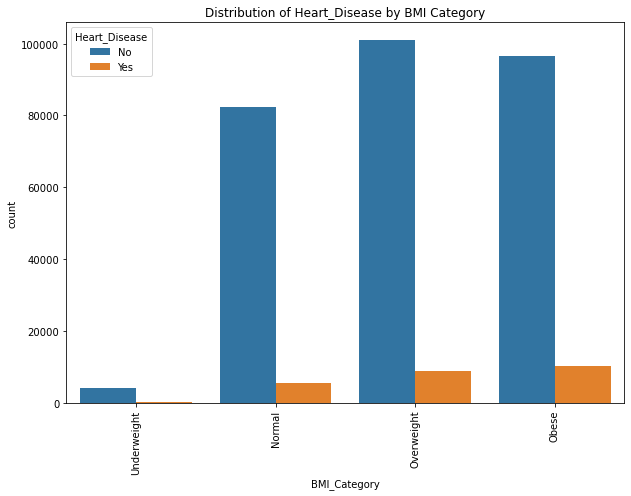

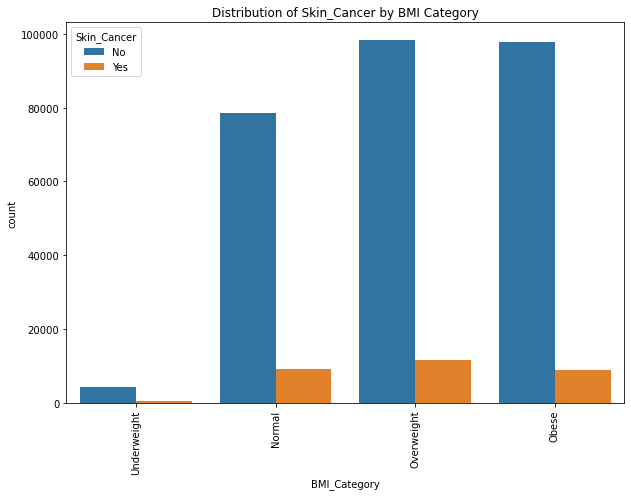

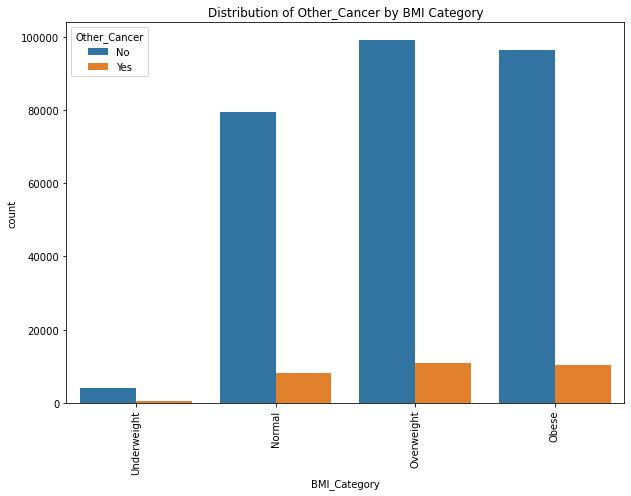

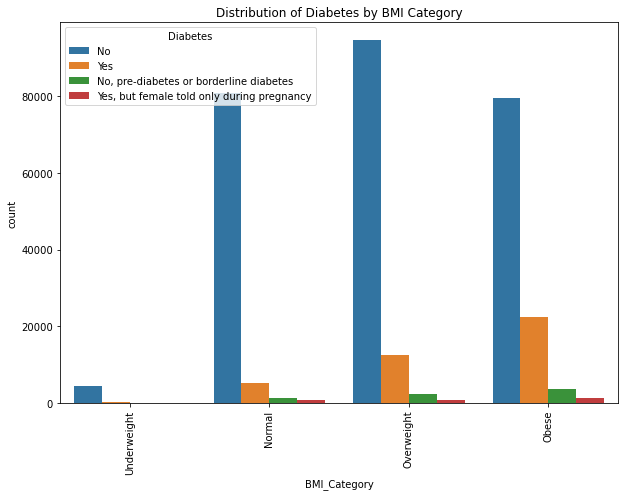

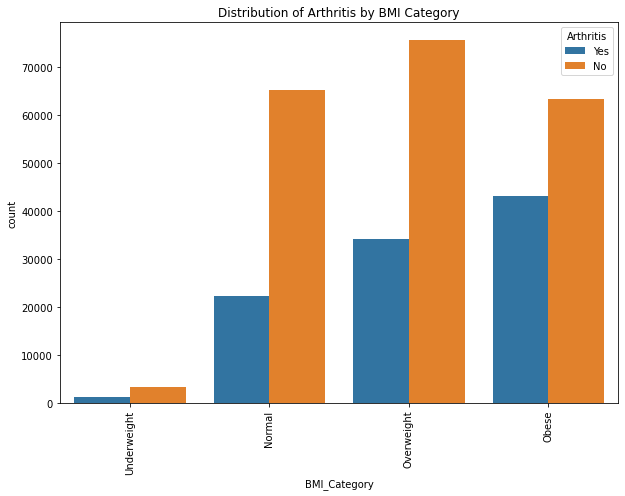

In [14]:
# Analyze the relationship between disease conditions, BMI, and exercise

# Creating a new BMI category
df['BMI_Category'] = pd.cut(df['BMI'],  bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight','Normal','Overweight','Obese'])

plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='BMI_Category', hue='Exercise')
plt.title('Distribution of BMI Category by Exercise')
plt.xticks(rotation=90)
plt.show()

for disease in disease_conditions:
    plt.figure(figsize=(10, 7))
    sns.countplot(data=df, x='BMI_Category', hue=disease)
    plt.title('Distribution of ' + disease + ' by BMI Category')
    plt.xticks(rotation=90)
    plt.show()

#### Output Interpretation: 
- The distribution of BMI Category by Exercise shows that individuals who exercise have a higher proportion of "Normal" BMI, while those who do not exercise have a higher proportion of "Overweight" and "Obese" BMI. This suggests that exercise is associated with healthier BMI levels. 

- The relationship between BMI Category and the disease conditions (Heart_Disease, Skin_Cancer, Other_Cancer, Diabetes, Arthritis) shows the following patterns:

    - For Heart_Disease, Diabetes, and Arthritis, the prevalence is higher among those with "Overweight" and "Obese" BMI. This suggests that these conditions may be associated with higher BMI levels.

    - For Skin_Cancer and Other_Cancer, the prevalence seems to be more evenly distributed across the different BMI categories. This could suggest that these types of cancer may not be as strongly associated with BMI as the other conditions.

## 3. Data Cleaning and Preprocessing

In [3]:
# Re-import the dataset
df = pd.read_csv('Dataset/CVD_cleaned.csv')

# Mapping for Diabetes
diabetes_mapping = {
    'No': 0, 
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
df['Diabetes'] = df['Diabetes'].map(diabetes_mapping)

# One-hot encoding for Sex
df = pd.get_dummies(df, columns=['Sex'])

# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})
    
# Ordinal encoding for General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
df['General_Health'] = df['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.2,
    'Within the past 5 years': 1,
    'Within the past 2 years': 2,
    'Within the past year': 4
    
}
df['Checkup'] = df['Checkup'].map(checkup_mapping)

age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
df['Age_Category'] = df['Age_Category'].map(age_category_mapping)    

# Display the first few rows of the cleaned dataset
df.head()


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male
0,0,2.0,0,0,0,0,0,0,1,10,150,32.66,14.54,1,0,30,16,12,1,0
1,3,4.0,0,1,0,0,0,1,0,10,165,77.11,28.29,0,0,30,0,4,1,0
2,3,4.0,1,0,0,0,0,1,0,8,163,88.45,33.47,0,4,12,3,16,1,0
3,0,4.0,1,1,0,0,0,1,0,11,180,93.44,28.73,0,0,30,30,8,0,1
4,2,4.0,0,0,0,0,0,0,0,12,191,88.45,24.37,1,0,8,4,0,0,1


#### Processing Steps:
- Diabetes: This variable represents whether an individual has diabetes. It is mapped from various categories into a binary format, where 'No' and 'No, pre-diabetes or borderline diabetes' are represented as 0, and 'Yes' and 'Yes, but female told only during pregnancy' are represented as 1.

- Sex: This variable represents the sex of the individual. It is one-hot encoded, which means it is split into two separate binary variables: Sex_Male and Sex_Female, where a 1 indicates the presence of the category and a 0 indicates the absence.

- Binary variables: Several variables such as Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, and Exercise are converted into binary format. This is done by mapping 'Yes' to 1 and 'No' to 0, making these variables easier to use in mathematical computations and models.

- General_Health: This variable represents the self-reported general health of the individual. It is mapped from descriptive categories into an ordinal format, where 'Poor' is represented as 0 and 'Excellent' is represented as 4, with intermediate categories assigned consecutive numbers.

- BMI_Category: This variable represents the BMI category of the individual. It is mapped from descriptive categories into an ordinal format, where 'Underweight' is represented as 0 and 'Obese' is represented as 3, with intermediate categories assigned consecutive numbers.

- Age_Category: This variable represents the age category of the individual. It is mapped from age ranges into an ordinal format, where '18-24' is represented as 0 and '80+' is represented as 12, with intermediate categories assigned consecutive numbers.

In [4]:
# Checking if there are any null values in the dataset or not
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
Sex_Female                      0
Sex_Male                        0
dtype: int64

In [5]:
#check duplicate values
df.duplicated().sum()

83

In [6]:
#drop the duplicated values
df = df.drop_duplicates()

### Correlation Matrix

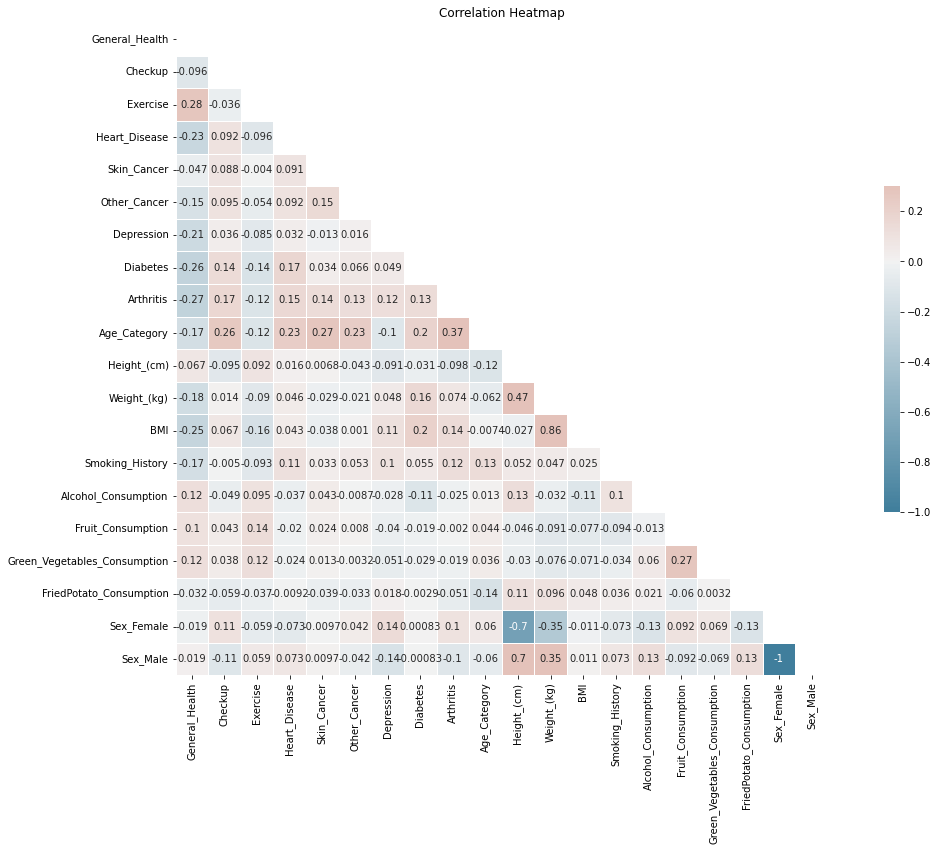

In [19]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

- The correlation heatmap provides a visual representation of the correlation between different features in the dataset. Each square shows the correlation between the variables on each axis. Correlation values range from -1 to 1. Values closer to 1 represent a strong positive correlation, values closer to -1 represent a strong negative correlation, and values around 0 represent no correlation.

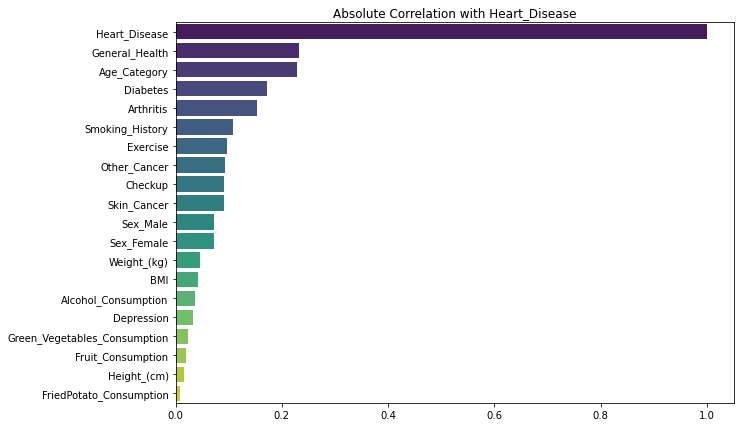

In [20]:
correlation_matrix = df.corr()

sorted_corr_abs = correlation_matrix["Heart_Disease"].abs().sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x=sorted_corr_abs.values, y=sorted_corr_abs.index, palette="viridis")
plt.title("Absolute Correlation with Heart_Disease")
plt.show()

-----------------------------------------------------------------

#### Some Interpretations:

Age and Disease Prevalence: 
- The positive correlation between Age_Category and the diseases under study aligns with established medical knowledge. It is well known that the risk of chronic conditions such as heart disease, cancer, diabetes, and arthritis increases with age. 

Health Perception and Disease Prevalence: 
- The negative correlation between self-rated General_Health and disease conditions underlines the importance of patients' perception of their own health. Patients who perceive their health as "Poor" or "Fair" are more likely to have chronic conditions. This could be because the symptoms or management of these conditions impact their perceived health status. 

Exercise and Health: 
- The negative correlation between Exercise and diseases such as heart disease, diabetes, and arthritis reaffirms the well-established belief in the health benefits of regular physical activity. Regular exercise can help control weight, reduce the risk of heart diseases, and manage blood sugar and insulin levels, among other benefits. 

BMI and Diabetes: 
- The positive correlation between BMI and diabetes aligns with existing knowledge. High BMI, especially obesity, is a known risk factor for type 2 diabetes. Excess fat, particularly if stored around the abdomen, can increase the body's resistance to insulin, leading to increased blood sugar. 

Gender and Disease Prevalence:
- The correlations between Sex and certain diseases reveal interesting patterns. For instance, heart disease is more common in males, which agrees with many studies showing men are at a higher risk of heart disease.

### Outliers 

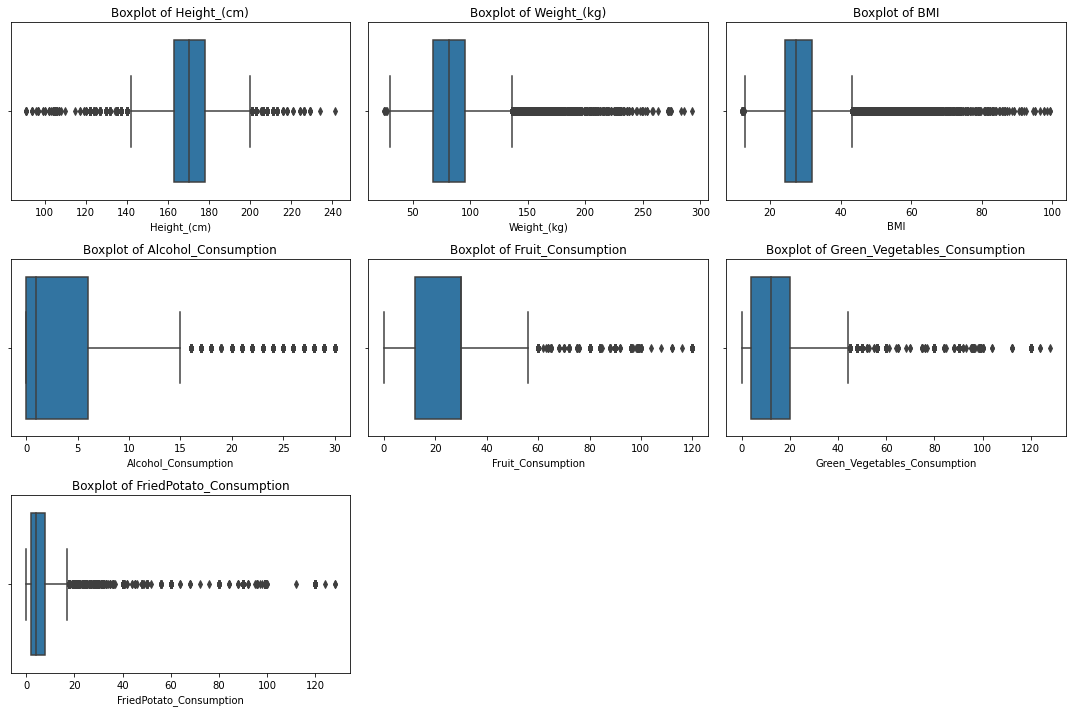

In [22]:
# List of numerical columns
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                  'Fruit_Consumption', 'Green_Vegetables_Consumption', 
                  'FriedPotato_Consumption']

# List of numerical columns
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                  'Fruit_Consumption', 'Green_Vegetables_Consumption', 
                  'FriedPotato_Consumption']

# Create box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

#### As shown from the Boxplots there are some outliers in each variable as any points below the minimum or above the maximum are considered outliers

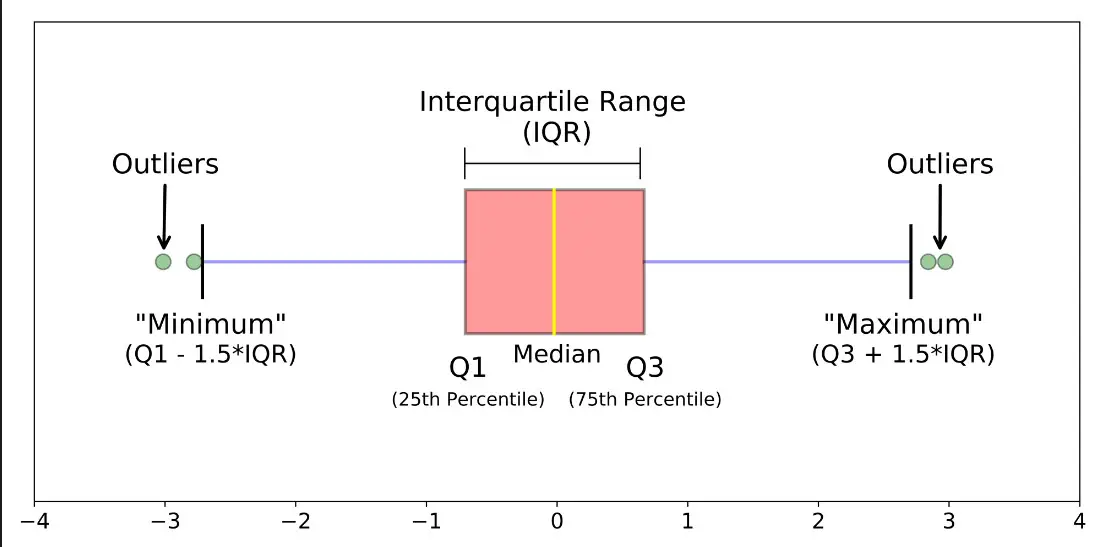

In [23]:
# Summary statistics
summary_stats = df[numerical_cols].describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308771.0,170.615297,10.658466,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308771.0,83.590514,21.344691,24.95,68.04,81.65,95.25,293.02
BMI,308771.0,28.626828,6.522826,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308771.0,5.097606,8.200459,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308771.0,29.834191,24.877874,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308771.0,15.109431,14.926935,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308771.0,6.297259,8.583870,0.00,2.00,4.00,8.00,128.00


#### Output Interpretation: 
- The summary statistics and boxplots indicate that there are some potential outliers in our numerical data. Here are a few observations:

    - Height_(cm): The minimum value is 91 cm, and the maximum is 241 cm. These could be extreme cases, but they're worth investigating further. 

    - Weight_(kg): The maximum weight is 293.02 kg, which seems quite high. This could potentially be an outlier or extreme value. 

    - BMI: The maximum BMI is 99.33, which is very high, even for extreme cases of obesity. This might indicate data entry errors. 

    - Alcohol_Consumption: The maximum value is 30, which seems quite high. We need to understand the measurement units to interpret whether this is an outlier or not. 

    - Fruit_Consumption, Green_Vegetables_Consumption, FriedPotato_Consumption: The maximum values seem quite high, but it depends on the measurement units which is the number of consumption in a month. 

- Note that I did not remove the outliers. 

# check for multicolinearity 

## 4. Feature Engineering

In [7]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Sex_Female',
       'Sex_Male'],
      dtype='object')

In [8]:
df.shape

(308771, 20)

In [9]:
# BMI Category
df['BMI_Category'] = pd.cut(df['BMI'],  bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight','Normal','Overweight','Obese'])

# Health Checkup Frequency
checkup_mapping = {'Within the past year': 4, 'Within the past 2 years': 2, 'Within the past 5 years': 1, '5 or more years ago': 0.2, 'Never': 0}
df['Checkup_Frequency'] = df['Checkup'].replace(checkup_mapping)

# Lifestyle Score
exercise_mapping = {'Yes': 1, 'No': 0}
smoking_mapping = {'Yes': -1, 'No': 0}
df['Lifestyle_Score'] = df['Exercise'].replace(exercise_mapping) - df['Smoking_History'].replace(smoking_mapping) + df['Fruit_Consumption']/10 + df['Green_Vegetables_Consumption']/10 - df['Alcohol_Consumption']/10

# Healthy Diet Score
df['Healthy_Diet_Score'] = df['Fruit_Consumption']/10 + df['Green_Vegetables_Consumption']/10 - df['FriedPotato_Consumption']/10

# Interaction Terms
df['Smoking_Alcohol'] = df['Smoking_History'].replace(smoking_mapping) * df['Alcohol_Consumption']
df['Checkup_Exercise'] = df['Checkup_Frequency'] * df['Exercise'].replace(exercise_mapping)

# Ratio of Height to Weight
df['Height_to_Weight'] = df['Height_(cm)'] / df['Weight_(kg)']

# Fruit and Vegetables Consumption Interaction
df['Fruit_Vegetables'] = df['Fruit_Consumption'] * df['Green_Vegetables_Consumption']

# Healthy_Diet_Lifestyle Interaction
df['HealthyDiet_Lifestyle'] = df['Healthy_Diet_Score'] * df['Lifestyle_Score']

# Alcohol_FriedPotato Interaction
df['Alcohol_FriedPotato'] = df['Alcohol_Consumption'] * df['FriedPotato_Consumption']


In [10]:
df.shape

(308771, 30)

In [11]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Sex_Female',
       'Sex_Male', 'BMI_Category', 'Checkup_Frequency', 'Lifestyle_Score',
       'Healthy_Diet_Score', 'Smoking_Alcohol', 'Checkup_Exercise',
       'Height_to_Weight', 'Fruit_Vegetables', 'HealthyDiet_Lifestyle',
       'Alcohol_FriedPotato'],
      dtype='object')

#### Feature Engineering:
- BMI_Category: This variable categorizes the BMI (Body Mass Index) of each individual into one of four categories: 'Underweight', 'Normal weight', 'Overweight', and 'Obesity'. This is based on the following ranges: underweight is a BMI less than 18.5, normal weight is a BMI from 18.5 to 24.9, overweight is a BMI from 25 to 29.9, and obesity is a BMI of 30 or higher.

- Checkup_Frequency: This variable represents the frequency of health check-ups for each individual. It assigns numeric values to the different frequency categories, where a higher value represents more frequent check-ups.

- Lifestyle_Score: This variable provides a composite score based on various lifestyle factors including exercise, smoking, fruit consumption, green vegetable consumption, and alcohol consumption. Each lifestyle factor is assigned a certain weight, with positive activities like exercise and healthy eating contributing positively to the score, and negative activities like smoking and alcohol consumption subtracting from the score.

- Healthy_Diet_Score: This variable calculates a score based on the individual's diet. It considers the consumption of fruits, green vegetables, and fried potatoes. More consumption of fruits and green vegetables adds positively to the score, while consumption of fried potatoes subtracts from the score.

- Smoking_Alcohol: This interaction term represents the combination of smoking and alcohol consumption. It multiplies the mapped values of smoking history and alcohol consumption.

- Checkup_Exercise: This interaction term represents the combination of health check-up frequency and exercise habits. It multiplies the mapped values of health check-up frequency and exercise habits.

- Height_to_Weight: This variable calculates the ratio of an individual's height to their weight.

- Fruit_Vegetables: This interaction term represents the combined consumption of fruits and green vegetables. It multiplies the values of fruit consumption and green vegetable consumption.

- Depression_Exercise: This interaction term represents the combination of depression status and exercise habits. It multiplies the mapped values of depression status and exercise habits.

- HealthyDiet_Lifestyle: This interaction term represents the combination of the Healthy Diet Score and the Lifestyle Score. It multiplies the values of these two scores.

- Alcohol_FriedPotato: This interaction term represents the combined consumption of alcohol and fried potatoes. It multiplies the values of alcohol consumption and fried potato consumption.

### Feature Selection

- In this section, I will select features  according to semantic importance / relevance  using different methods. These methods are: Extra Trees, Best K Features, and Regularized Logistic Regression.

In [12]:
df = df.drop(["Checkup"], axis=1)

In [13]:
bmi_mapping = {
    'Underweight': 0,
    'Normal': 1,
    'Overweight': 2,
    'Obese': 3
}

df['BMI_Category'] = df['BMI_Category'].map(bmi_mapping).astype(int)

In [14]:
df.head(5)

,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),...,BMI_Category,Checkup_Frequency,Lifestyle_Score,Healthy_Diet_Score,Smoking_Alcohol,Checkup_Exercise,Height_to_Weight,Fruit_Vegetables,HealthyDiet_Lifestyle,Alcohol_FriedPotato
0,0,0,0,0,0,0,0,1,10,150,...,0,2.0,3.6,3.4,0,0.0,4.592774,480,12.24,0
1,3,0,1,0,0,0,1,0,10,165,...,2,4.0,3.0,2.6,0,0.0,2.139800,0,7.80,0
2,3,1,0,0,0,0,1,0,8,163,...,3,4.0,2.1,-0.1,0,4.0,1.842849,36,-0.21,64
3,0,1,1,0,0,0,1,0,11,180,...,2,4.0,7.0,5.2,0,4.0,1.926370,900,36.40,0
4,2,0,0,0,0,0,0,0,12,191,...,1,4.0,0.2,1.2,0,0.0,2.159412,32,0.24,0


In [15]:
df.shape

(308771, 29)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308771 entries, 0 to 308853
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308771 non-null  int64  
 1   Exercise                      308771 non-null  int64  
 2   Heart_Disease                 308771 non-null  int64  
 3   Skin_Cancer                   308771 non-null  int64  
 4   Other_Cancer                  308771 non-null  int64  
 5   Depression                    308771 non-null  int64  
 6   Diabetes                      308771 non-null  int64  
 7   Arthritis                     308771 non-null  int64  
 8   Age_Category                  308771 non-null  int64  
 9   Height_(cm)                   308771 non-null  int64  
 10  Weight_(kg)                   308771 non-null  float64
 11  BMI                           308771 non-null  float64
 12  Smoking_History               308771 non-nul

In [34]:
# Importing necessary library
from sklearn.model_selection import train_test_split

# Get the names of all columns in the DataFrame
df_clean_name = df.columns

# Selecting features (all columns except the target variable)
X_c = df.drop('Heart_Disease', axis=1)  # Use iloc to select columns by index

# Selecting the target variable
Y_c = df['Heart_Disease']

# Splitting the data into training and testing sets
# test_size=0.25: Splitting ratio, 20% of the data will be used for testing
# random_state=0: Seed for random number generation for reproducibility
# stratify=df['Heart_Disease']: Ensures that the distribution of the target variable is
#                                  preserved in the training and testing sets
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, Y_c,
                                                            test_size=0.2,
                                                            random_state=0,
                                                            stratify=df['Heart_Disease'])


### I- Extra Trees

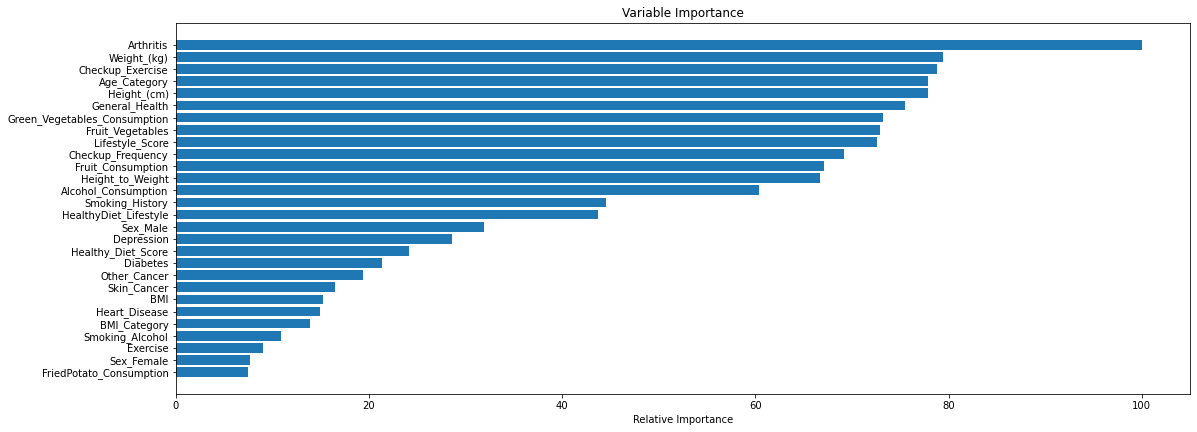

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=7)

clf.fit(X_train_c, y_train_c)

# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(40, 15))
plt.subplot(2, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [36]:
for idx in sorted_idx:
    print(f"{df.columns[idx]}: {feature_importance[idx]}")

FriedPotato_Consumption: 7.454037757389871
Sex_Female: 7.731478189672022
Exercise: 9.029190749754427
Smoking_Alcohol: 10.919371471738993
BMI_Category: 13.942900937752295
Heart_Disease: 14.962061461486773
BMI: 15.27255740768666
Skin_Cancer: 16.477786770343826
Other_Cancer: 19.447020801154313
Diabetes: 21.350596493712015
Healthy_Diet_Score: 24.13728441547881
Depression: 28.562490514883343
Sex_Male: 31.9219983653591
HealthyDiet_Lifestyle: 43.71776930704547
Smoking_History: 44.499607815383094
Alcohol_Consumption: 60.36718812510367
Height_to_Weight: 66.73862637501091
Fruit_Consumption: 67.13159837889397
Checkup_Frequency: 69.18081034293343
Lifestyle_Score: 72.57826012177992
Fruit_Vegetables: 72.86579265589239
Green_Vegetables_Consumption: 73.2346637129022
General_Health: 75.44454995140245
Height_(cm): 77.84102853286358
Age_Category: 77.92009468078997
Checkup_Exercise: 78.78128595617322
Weight_(kg): 79.39228685392173
Arthritis: 100.0


We can see that these are the best Features according to Extra Trees:
Sure, here's the list in reverse order with numbering:

1. Arthritis
2. Weight_(kg)
3. Checkup_Exercise
4. Age_Category
5. Height_(cm)
6. General_Health
7. Green_Vegetables_Consumption
8. Fruit_Vegetables
9. Lifestyle_Score
10. Checkup_Frequency
11. Fruit_Consumption
12. Height_to_Weight
13. Alcohol_Consumption
14. Smoking_History
15. HealthyDiet_Lifestyle
16. Sex_Male
17. Depression
18. Healthy_Diet_Score
19. Diabetes
20. Other_Cancer
21. Skin_Cancer
22. BMI
23. Heart_Disease
24. BMI_Category
25. Smoking_Alcohol
26. Exercise
27. Sex_Female
28. FriedPotato_Consumption

### II- Best K Features

In [37]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'df' contains your dataset and 'Outcome' is your target variable
X = df.drop(columns=['Heart_Disease', 'Lifestyle_Score', 'Healthy_Diet_Score', 'HealthyDiet_Lifestyle'])
y = df['Heart_Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=df['Heart_Disease'])

# Use SelectKBest with chi2 for feature selection
k_features = 24  # Specify the number of features to select
selector = SelectKBest(chi2, k=k_features).fit(X_train, y_train)

# Transform both training and testing data
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print(f"Original shape of X_train: {X_train.shape}")
print(f"Shape of X_train after feature selection: {X_train_selected.shape}")
print(f"Original shape of X_test: {X_test.shape}")
print(f"Shape of X_test after feature selection: {X_test_selected.shape}")

Original shape of X_train: (231578, 25)
Shape of X_train after feature selection: (231578, 24)
Original shape of X_test: (77193, 25)
Shape of X_test after feature selection: (77193, 24)


In [38]:
selector = SelectKBest(chi2, k=k_features).fit(X_train, y_train)

selected_features_indices = selector.get_support(indices=True)


selected_features_names = X.columns[selected_features_indices]

print(f"Selected features: {selected_features_names}")


Selected features: Index(['General_Health', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Age_Category', 'Weight_(kg)',
       'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Sex_Female',
       'Sex_Male', 'BMI_Category', 'Checkup_Frequency', 'Smoking_Alcohol',
       'Checkup_Exercise', 'Height_to_Weight', 'Fruit_Vegetables',
       'Alcohol_FriedPotato'],
      dtype='object')


### III- Regularized Logistic Regression



In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=df['Heart_Disease'])

# Standardizing the features before choosing the best ones 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=0)

logreg.fit(X_train_scaled, y_train)

model = SelectFromModel(logreg, prefit=True)


X_train_selected = model.transform(X_train_scaled)
X_test_selected = model.transform(X_test_scaled)

selected_features = X.columns[model.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['General_Health', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Age_Category', 'Height_(cm)',
       'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption', 'Sex_Female', 'Sex_Male', 'BMI_Category',
       'Checkup_Frequency', 'Smoking_Alcohol', 'Checkup_Exercise',
       'Height_to_Weight', 'Fruit_Vegetables', 'HealthyDiet_Lifestyle',
       'Alcohol_FriedPotato'],
      dtype='object')


#### Common Features among the three are: 
1. General_Health
2. Exercise
3. Skin_Cancer
4. Other_Cancer
5. Depression
6. Diabetes
7. Arthritis
8. Age_Category
9. Height_(cm)
10. Weight_(kg)
11. Smoking_History
12. Alcohol_Consumption
13. Fruit_Consumption
14. Green_Vegetables_Consumption
15. FriedPotato_Consumption
16. Sex_Female
17. Sex_Male
18. Checkup_Frequency
19. Smoking_Alcohol
20. Checkup_Exercise
21. Height_to_Weight
22. Fruit_Vegetables
23. BMI

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
General_Health,308771.0,2.530280,1.031244,0.0000,2.00000,3.00000,3.000000,4.000000
Exercise,308771.0,0.775014,0.417573,0.0000,1.00000,1.00000,1.000000,1.000000
Heart_Disease,308771.0,0.080872,0.272639,0.0000,0.00000,0.00000,0.000000,1.000000
Skin_Cancer,308771.0,0.097133,0.296140,0.0000,0.00000,0.00000,0.000000,1.000000
Other_Cancer,308771.0,0.096761,0.295633,0.0000,0.00000,0.00000,0.000000,1.000000
Depression,308771.0,0.200469,0.400352,0.0000,0.00000,0.00000,0.000000,1.000000
Diabetes,308771.0,0.138666,0.345598,0.0000,0.00000,0.00000,0.000000,1.000000
Arthritis,308771.0,0.327307,0.469231,0.0000,0.00000,0.00000,1.000000,1.000000
Age_Category,308771.0,6.536113,3.523502,0.0000,4.00000,7.00000,9.000000,12.000000
Height_(cm),308771.0,170.615297,10.658466,91.0000,163.00000,170.00000,178.000000,241.000000


In [17]:
# df of the selected features
df_final = df[['General_Health', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes',
    'Arthritis', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'Smoking_History', 'Alcohol_Consumption',
    'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Sex_Female',
    'Sex_Male', 'Checkup_Frequency', 'Smoking_Alcohol', 'Checkup_Exercise', 'Height_to_Weight', 
    'Fruit_Vegetables','BMI', 'Heart_Disease']]

In [18]:
df_final.head(4)

,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),...,FriedPotato_Consumption,Sex_Female,Sex_Male,Checkup_Frequency,Smoking_Alcohol,Checkup_Exercise,Height_to_Weight,Fruit_Vegetables,BMI,Heart_Disease
0,0,0,0,0,0,0,1,10,150,32.66,...,12,1,0,2.0,0,0.0,4.592774,480,14.54,0
1,3,0,0,0,0,1,0,10,165,77.11,...,4,1,0,4.0,0,0.0,2.139800,0,28.29,1
2,3,1,0,0,0,1,0,8,163,88.45,...,16,1,0,4.0,0,4.0,1.842849,36,33.47,0
3,0,1,0,0,0,1,0,11,180,93.44,...,8,0,1,4.0,0,4.0,1.926370,900,28.73,1


In [19]:
df_final.shape

(308771, 24)

## 5. Model Training and Validation

### Scaling
- MinMaxScaler: Scales each feature to a range between 0 and 1.

In [20]:
from sklearn.preprocessing import MinMaxScaler
# Define the scaler
scaler = MinMaxScaler()

# Scale the features using MinMaxScaler
df_scaled = scaler.fit_transform(df_final.drop('Heart_Disease', axis=1))

# Convert the scaled features back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_final.drop('Heart_Disease', axis=1).columns)

In [21]:
df_scaled.head(4)

,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),...,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male,Checkup_Frequency,Smoking_Alcohol,Checkup_Exercise,Height_to_Weight,Fruit_Vegetables,BMI
0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.833333,0.393333,0.028761,...,0.125000,0.09375,1.0,0.0,0.5,0.0,0.0,0.812618,0.033333,0.028863
1,0.75,0.0,0.0,0.0,0.0,1.0,0.0,0.833333,0.493333,0.194576,...,0.000000,0.03125,1.0,0.0,1.0,0.0,0.0,0.311854,0.000000,0.186347
2,0.75,1.0,0.0,0.0,0.0,1.0,0.0,0.666667,0.480000,0.236878,...,0.023438,0.12500,1.0,0.0,1.0,0.0,1.0,0.251232,0.002500,0.245676
3,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.916667,0.593333,0.255493,...,0.234375,0.06250,0.0,1.0,1.0,0.0,1.0,0.268283,0.062500,0.191387


In [23]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from imblearn.combine import SMOTETomek
from collections import Counter
import pandas as pd

# Define the features (X) and target (y)
X = df_scaled
y = df_final['Heart_Disease']

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Display class distribution before resampling
print("Class distribution before resampling:")
print(Counter(y_train))

Class distribution before resampling:
Counter({0: 227087, 1: 19929})


### Handling Class Imbalance 
- In this section I will handle the class imbalance by applying different methods to handle class imbalance, including Resampling (Random Over-sampling and Random Under-sampling), SMOTE, TOMEK, and SMOTE combined with TOMEK.  

#### Methods Description:
- Random Over-sampling: generating new samples by random sampling with the replacement of the currently available samples.


- Random Under-sampling is used to balance the data by randomly selecting a subset of data for the targeted classes. Under-sample the majority class(es) by randomly picking samples with or without replacement.


- SMOTE: Over-samples the minority class to address class imbalance.


- TomekLinks: Under-samples the majority class to address class imbalance.


- SMOTE combined with TOMEK: SMOTE + TOMEK is a combination of the SMOTE over-sampling and TOMEK under-sampling techniques. First, SMOTE is used to generate synthetic samples for the minority class, thus increasing its representation in the dataset. Then, TOMEK Links are applied to remove samples that form links between the minority and majority classes. 



In [28]:
# Method : Resampling (Random Over-sampling and Random Under-sampling)
random_over_sampler = RandomOverSampler(random_state=42)
random_under_sampler = RandomUnderSampler(random_state=42, replacement=True)

# Perform Random Over-sampling on the training data
X_train_resampled_over, y_train_resampled_over = random_over_sampler.fit_resample(X, y)

# Perform Random Under-sampling on the training data
X_train_resampled_under, y_train_resampled_under = random_under_sampler.fit_resample(X, y)

# Display class distribution after resampling
print("\nClass distribution after resampling:")
print("Random Over-sampling:", Counter(y_train_resampled_over))
print("Random Under-sampling:", Counter(y_train_resampled_under))


Class distribution after resampling:
Random Over-sampling: Counter({0: 283800, 1: 283800})
Random Under-sampling: Counter({0: 24971, 1: 24971})


In [27]:
# Method : SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X, y)

# Display class distribution after resampling
print("\nClass distribution after resampling:")
print("SMOTE:", Counter(y_train_resampled_smote))


Class distribution after resampling:
SMOTE: Counter({0: 283800, 1: 283800})


In [30]:
from imblearn.under_sampling import TomekLinks
from collections import Counter

# Method: TOMEK links
tomek = TomekLinks()
X_train_resampled_tomek, y_train_resampled_tomek = tomek.fit_resample(X, y)

# Display class distribution after resampling
print("\nClass distribution after resampling:")
print("TOMEK:", Counter(y_train_resampled_tomek))



Class distribution after resampling:
TOMEK: Counter({0: 274278, 1: 24971})


In [31]:
# Method : SMOTE + TOMEK
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled_smote_tomek, y_train_resampled_smote_tomek = smote_tomek.fit_resample(X, y)


In [32]:
# Display class distribution after resampling
print("SMOTE + TOMEK:", Counter(y_train_resampled_smote_tomek))

SMOTE + TOMEK: Counter({0: 282212, 1: 282212})


In [33]:
# Display class distribution before resampling
print("Class distribution before resampling:")
print(Counter(y_train))

# Display class distribution after resampling
print("\nClass distribution after resampling:")
print("Random Over-sampling:", Counter(y_train_resampled_over))
print("Random Under-sampling:", Counter(y_train_resampled_under))
print("SMOTE:", Counter(y_train_resampled_smote))
print("TOMEK:", Counter(y_train_resampled_tomek))
print("SMOTE + TOMEK:", Counter(y_train_resampled_smote_tomek))

Class distribution before resampling:
Counter({0: 227087, 1: 19929})

Class distribution after resampling:
Random Over-sampling: Counter({0: 283800, 1: 283800})
Random Under-sampling: Counter({0: 24971, 1: 24971})
SMOTE: Counter({0: 283800, 1: 283800})
TOMEK: Counter({0: 274278, 1: 24971})
SMOTE + TOMEK: Counter({0: 282212, 1: 282212})


## 6. Model Evaluation

### Code Below Description: 

1. **Handling Class Imbalance Techniques**

2. **Implemented ML Models**:Several machine learning models were implemented, including Logistic Regression and Decision Tree classifiers. 

3. **Cross-Validation**: Stratified k-fold cross-validation was utilized to assess the performance of the models. This technique ensures that each fold of the dataset retains the same class distribution as the original dataset, thus providing a robust estimate of model performance.

4. **Grid Search CV for Hyperparameter Tuning**: Grid search cross-validation was employed to tune the hyperparameters of the models. For each model, a parameter grid was defined, and grid search was performed to find the combination of hyperparameters that maximized performance.

5. **Model Evaluation**: The performance of each model was evaluated using various metrics, including precision, recall, F1-score, and confusion matrices. These metrics provide insights into the model's ability to correctly classify instances from each class.


Training and evaluating models using SMOTE resampled dataset:

Model: Logistic_Regression
Fitting 5 folds for each of 5 candidates, totalling 25 fits
              precision    recall  f1-score   support

           0       0.97      0.73      0.84     56713
           1       0.21      0.79      0.33      5042

    accuracy                           0.74     61755
   macro avg       0.59      0.76      0.58     61755
weighted avg       0.91      0.74      0.80     61755

Best Parameters: {'model__C': 10}


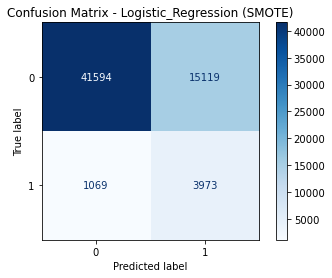

------------------------------------------------------------

Model: Decision_Tree
Fitting 5 folds for each of 4 candidates, totalling 20 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56713
           1       1.00      1.00      1.00      5042

    accuracy                           1.00     61755
   macro avg       1.00      1.00      1.00     61755
weighted avg       1.00      1.00      1.00     61755

Best Parameters: {'model__max_depth': None}


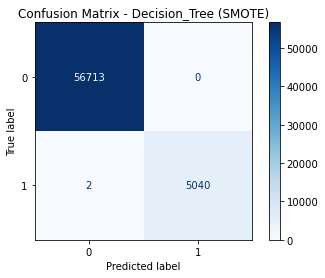

------------------------------------------------------------

Training and evaluating models using TOMEK resampled dataset:

Model: Logistic_Regression
Fitting 5 folds for each of 5 candidates, totalling 25 fits
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     56713
           1       0.51      0.10      0.16      5042

    accuracy                           0.92     61755
   macro avg       0.72      0.54      0.56     61755
weighted avg       0.89      0.92      0.89     61755

Best Parameters: {'model__C': 10}


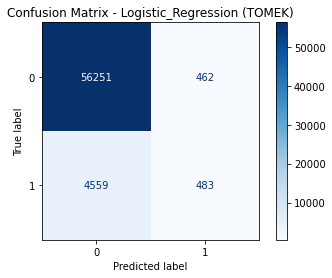

------------------------------------------------------------

Model: Decision_Tree
Fitting 5 folds for each of 4 candidates, totalling 20 fits
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56713
           1       0.90      1.00      0.95      5042

    accuracy                           0.99     61755
   macro avg       0.95      0.99      0.97     61755
weighted avg       0.99      0.99      0.99     61755

Best Parameters: {'model__max_depth': None}


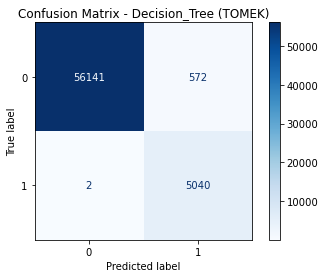

------------------------------------------------------------

Training and evaluating models using SMOTE + TOMEK resampled dataset:

Model: Logistic_Regression
Fitting 5 folds for each of 5 candidates, totalling 25 fits
              precision    recall  f1-score   support

           0       0.97      0.73      0.84     56713
           1       0.21      0.79      0.33      5042

    accuracy                           0.74     61755
   macro avg       0.59      0.76      0.58     61755
weighted avg       0.91      0.74      0.80     61755

Best Parameters: {'model__C': 10}


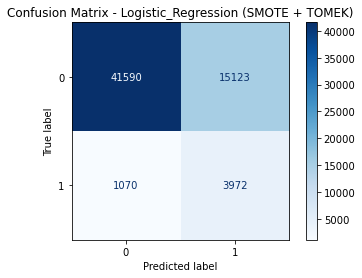

------------------------------------------------------------

Model: Decision_Tree
Fitting 5 folds for each of 4 candidates, totalling 20 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56713
           1       0.99      1.00      0.99      5042

    accuracy                           1.00     61755
   macro avg       0.99      1.00      1.00     61755
weighted avg       1.00      1.00      1.00     61755

Best Parameters: {'model__max_depth': None}


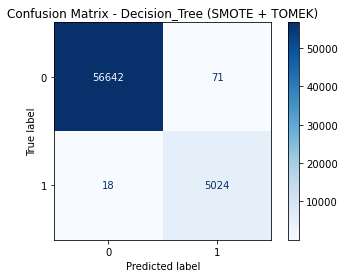

------------------------------------------------------------

Training and evaluating models using Random Over-sampling resampled dataset:

Model: Logistic_Regression
Fitting 5 folds for each of 5 candidates, totalling 25 fits
              precision    recall  f1-score   support

           0       0.98      0.73      0.83     56713
           1       0.21      0.79      0.33      5042

    accuracy                           0.73     61755
   macro avg       0.59      0.76      0.58     61755
weighted avg       0.91      0.73      0.79     61755

Best Parameters: {'model__C': 10}


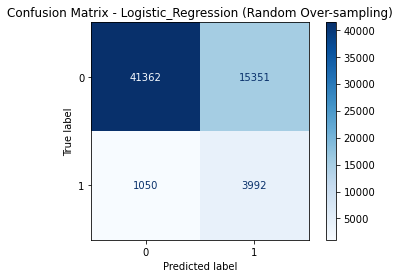

------------------------------------------------------------

Model: Decision_Tree
Fitting 5 folds for each of 4 candidates, totalling 20 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56713
           1       1.00      1.00      1.00      5042

    accuracy                           1.00     61755
   macro avg       1.00      1.00      1.00     61755
weighted avg       1.00      1.00      1.00     61755

Best Parameters: {'model__max_depth': None}


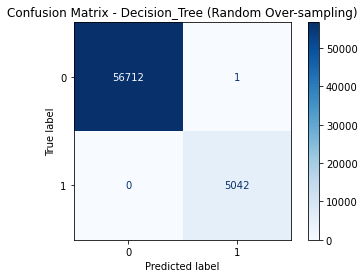

------------------------------------------------------------

Training and evaluating models using Random Under-sampling resampled dataset:

Model: Logistic_Regression
Fitting 5 folds for each of 5 candidates, totalling 25 fits
              precision    recall  f1-score   support

           0       0.98      0.73      0.83     56713
           1       0.21      0.80      0.33      5042

    accuracy                           0.73     61755
   macro avg       0.59      0.76      0.58     61755
weighted avg       0.91      0.73      0.79     61755

Best Parameters: {'model__C': 0.1}


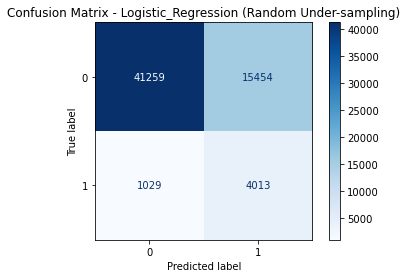

------------------------------------------------------------

Model: Decision_Tree
Fitting 5 folds for each of 4 candidates, totalling 20 fits
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     56713
           1       0.20      0.78      0.32      5042

    accuracy                           0.73     61755
   macro avg       0.59      0.75      0.58     61755
weighted avg       0.91      0.73      0.79     61755

Best Parameters: {'model__max_depth': 5}


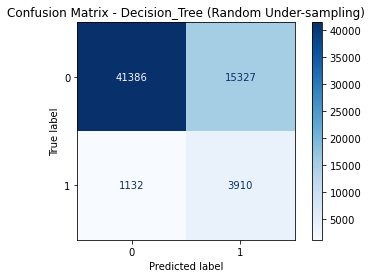

------------------------------------------------------------


In [46]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Define your machine learning models
models = {
    'Logistic_Regression': LogisticRegression(max_iter=10000, random_state=22),
    'Decision_Tree': DecisionTreeClassifier(random_state=22),
    #'Random_Forest': RandomForestClassifier(n_estimators=100, random_state=22),
    #'K-Nearest_Neighbor': KNeighborsClassifier(),
    #'GaussianNB': GaussianNB(),
    #'SVM': SVC(random_state=22)
}

# Define parameter grids for grid search
param_grids = {
    'Logistic_Regression': {'model__C': [0.001, 0.01, 0.1, 1, 10]},  
    'Decision_Tree': {'model__max_depth': [None, 5, 10, 15]},         
    #'Random_Forest': {'model__n_estimators': [50, 100, 200], 'model__max_depth': [None, 5, 10]}, 
    #'K-Nearest_Neighbor': {'model__n_neighbors': [3, 5, 7]},
    #'GaussianNB': {},  # No hyperparameters for GaussianNB
    #'SVM': {'model__C': [0.1, 1, 10], 'model__gamma': ['scale', 'auto']}
}

# Iterate over the resampled datasets and train/evaluate models with cross-validation and grid search
for method, (X_train_resampled, y_train_resampled) in resampled_datasets.items():
    print(f"\nTraining and evaluating models using {method} resampled dataset:")
    for model_name, model in models.items():
        print(f"\nModel: {model_name}")
        
        # Define pipeline with resampling and model
        pipeline = Pipeline([
            ('model', model)
        ])
        
        # Define stratified k-fold cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        # Perform grid search
        grid_search = GridSearchCV(pipeline, param_grid=param_grids[model_name], cv=cv, scoring='f1', verbose=1, n_jobs=-1)
        grid_search.fit(X_train_resampled, y_train_resampled)
        
        # Get best model
        best_model = grid_search.best_estimator_
        
        # Make predictions
        y_pred = best_model.predict(X_test)
        
        # Print classification report
        print(classification_report(y_test, y_pred))
        print('Best Parameters:', grid_search.best_params_)
        
        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix - {model_name} ({method})')
        plt.show()
        
        print('------------------------------------------------------------')